<a href="https://colab.research.google.com/github/matsunagalab/lecture_ML/blob/main/machine_learning_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10回 教師なし学習その3: 階層的クラスタリングと主成分分析

## iris data の階層的クラスタリング

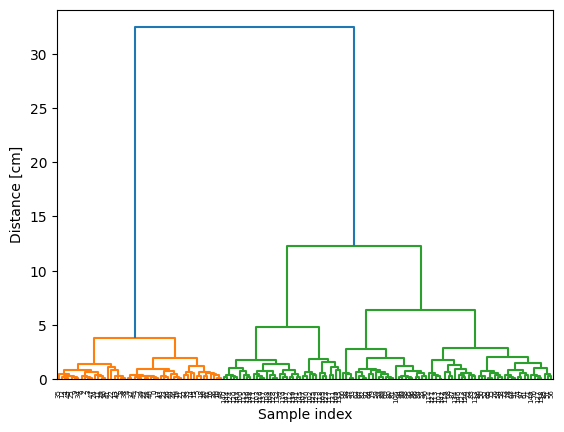

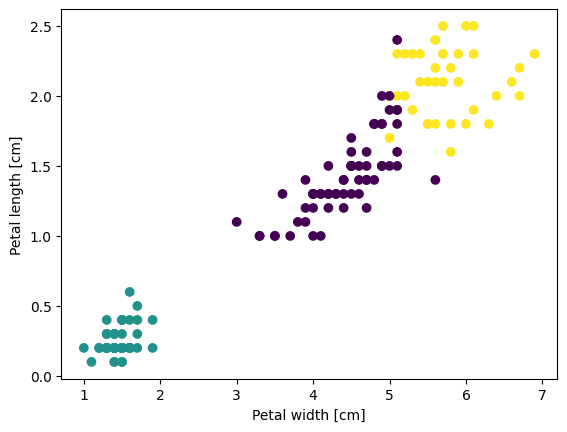

In [ ]:
# load required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# load the iris dataset
iris = load_iris()
X = iris.data # Use sepal width and sepal length for clustering

# compute the linkage matrix using "ward" method
linkage_matrix = linkage(X, method='ward')

# plot the dendrogram
dendrogram(linkage_matrix)

# perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=10, linkage="ward")  # Choose an appropriate threshold and use "ward" linkage
clustering.fit(X)

plt.xlabel("Sample index")
plt.ylabel("Distance [cm]")
plt.show()

# plot the scatter plot of the clustering results
plt.scatter(X[:, 2], X[:, 3], c=clustering.labels_)
plt.xlabel("Petal width [cm]")
plt.ylabel("Petal length [cm]")
plt.show()

## irid data の主成分分析

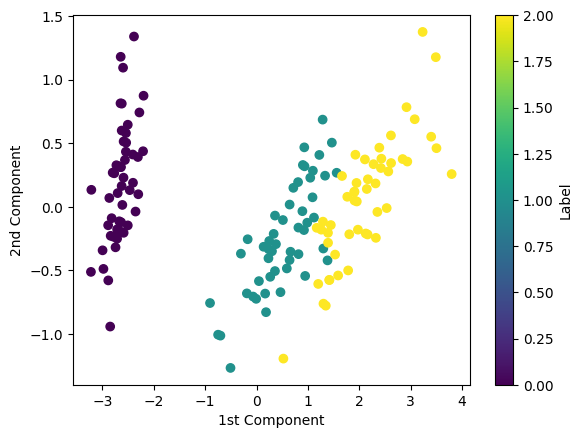

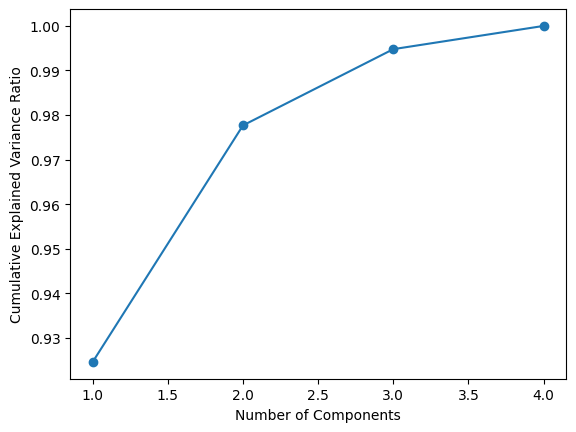

In [ ]:
# load required packages
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load the iris dataset
iris = load_iris()
X = iris.data

# perform PCA
pca = PCA(n_components=4)  # Choose the number of components
X_pca = pca.fit_transform(X)

# plot the scatter plot using the 1st and 2nd components with colored labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.colorbar(label="Label")
plt.show()

# compute cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# plot the cumulative explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()

比較のためにt-SNEというよく使われる手法でも可視化してみましょう

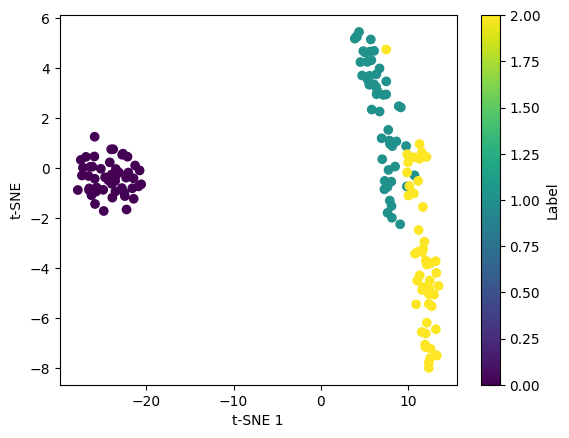

In [10]:
# load required packages
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# load the iris dataset
iris = load_iris()
X = iris.data

# perform PCA
tsne = TSNE(n_components=2)  # Choose the number of components
X_tsne = tsne.fit_transform(X)

# plot the scatter plot using the 1st and 2nd components with colored labels
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE")
plt.colorbar(label="Label")
plt.show()